In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
cd ../tests

/Users/mitchallain/Development/Python/BeagleBone-excavator/tests


In [4]:
from trajectories import *
from sg_model import sg_model

In [5]:
print(sg_model)
print(sg_model[0]['subgoal_pos'], sg_model[1]['subgoal_pos'])

[{'subgoal': 1, 'npt': [3, 3, 1.5, 0.2], 'onpt': [], 'it': [3, 0.5], 'subgoal_pos': [9.868125000000001, 9.3768, 1.225, 1.1967504514768619]}, {'subgoal': 2, 'npt': [2, 2, 3, 0.2], 'onpt': [], 'it': [0, -0.5], 'subgoal_pos': [7.862608695652173, 6.1048484848484845, 1.2072916666666669, 1.200677442293849]}, {'subgoal': 3, 'npt': [3, 2, 1.5, 0.2], 'onpt': [], 'it': [1, 0.5], 'subgoal_pos': [7.828260869565217, 9.339200000000002, 9.471764705882354, 1.200677442293849]}, {'subgoal': 4, 'npt': [1.5, 2, 2, 0.2], 'onpt': [], 'it': [0, 0.5], 'subgoal_pos': [9.908750000000001, 9.3768, 9.442941176470589, 1.200677442293849]}, {'subgoal': 5, 'npt': [3, 3, 2, 0.2], 'onpt': [], 'it': [3, -0.5], 'subgoal_pos': [9.868125000000001, 9.3768, 9.442941176470589, 0.2974695543867835]}, {'subgoal': 6, 'npt': [3, 3, 1.5, 0.2], 'onpt': [], 'it': [2, -0.5], 'subgoal_pos': [9.8275, 9.339200000000002, 2.4115517241379307, 0.2974695543867835]}]
([9.868125000000001, 9.3768, 1.225, 1.1967504514768619], [7.862608695652173, 6

In [6]:
pi = sg_model[0]['subgoal_pos']
pf = sg_model[1]['subgoal_pos']
print pi, pf

[9.868125000000001, 9.3768, 1.225, 1.1967504514768619] [7.862608695652173, 6.1048484848484845, 1.2072916666666669, 1.200677442293849]


In [7]:
dt, amax, tf, Dmin, vmax = sine_traj(pi, pf, [0]*4, [20]*4, [10]*4)

In sine_traj:  [9.868125000000001, 9.3768, 1.225, 1.1967504514768619] [7.862608695652173, 6.1048484848484845, 1.2072916666666669, 1.200677442293849] [0, 0, 0, 0] [20, 20, 20, 20] [10, 10, 10, 10] 



In [8]:
print dt
print amax
print tf
print Dmin
print vmax

[0.4304676688214252, 0.5067581701050827, 0.08897289096622284, 0.0538540581116396]
[-2.740442293366991, -3.2261227089770981, -0.56641901593802424, 0.34284558216102495]
[2.5609982660661785, 3.0148763518227604, 0.52932992648494759, 0.32039607021393024]
[-0.50781057211606861, -0.82848070955246622, -0.004483872238648416, 0.00099434118244045373]
[-1.1796718055653288, -1.6348640405356865, -0.050395937346249066, 0.018463625905018745]


In [9]:
print sine_func(0.1, dt[0], tf[0], amax[0], vmax[0], pi[0], 0, 0, pf[1], 0,  0.1, Dmin)

(9.8678262605658027, -0.011843637596052062, -0.3489930967603474, -6.6672744419695285)


In [10]:
sine_func_vector = np.vectorize(sine_func)

tt = np.linspace(0, 3, 301)
p = np.zeros((302, 4))

for i, t in enumerate(tt):
    p[i+1], _, _, _ = sine_func_vector([t]*4, dt, tf, amax, vmax, pi, [0]*4, [0]*4, pf, p[i].tolist(), [0.01], Dmin)


In [11]:
len(p)

302

In [12]:
pt = p.transpose()

<IPython.core.display.Javascript object>


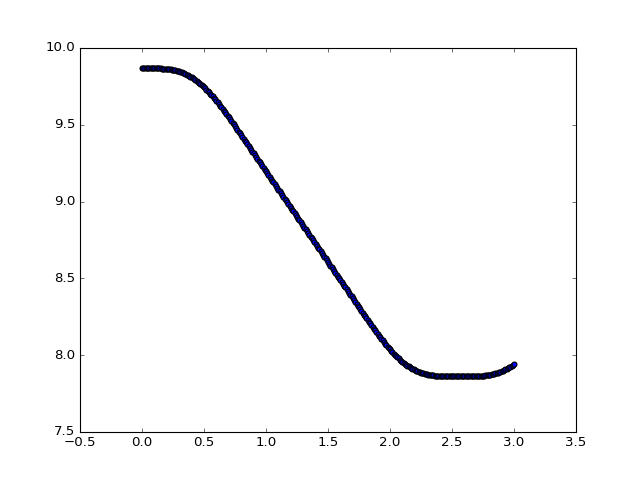

In [13]:
plt.scatter(tt, pt[0][1:])
plt.show()

In [15]:
x_eef = [0]*len(p)
y_eef = [0]*len(p)
z_eef = [0]*len(p)

for i in range(len(p)):
    x_eef[i], y_eef[i], z_eef[i], _ = forward_kin(exc, p[i][3], p[i][1:4])

NameError: name 'exc' is not defined

<IPython.core.display.Javascript object>


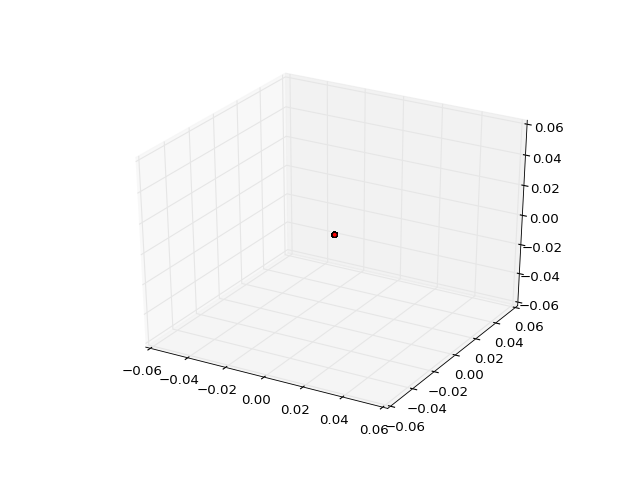

In [16]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter(x_eef, y_eef, z_eef, zdir='y', c='r')